# Cogs final project: Housing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import numpy as np

import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.regression.linear_model import OLS

In [2]:
#1990 census data
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [4]:
df['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [5]:
df['total_bedrooms'].isna().sum()

207

In [6]:
df=df.dropna()

In [7]:
df.count()

longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

In [8]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#change ocean prox into number values
#<1H OCEAN = 0
#INLAND = 1
#NEAR OCEAN = 2
#NEAR BAY = 3
#ISLAND = 4

df['ocean_proximity'].replace('<1H OCEAN', 0,inplace=True)
df['ocean_proximity'].replace('INLAND', 1,inplace=True)
df['ocean_proximity'].replace('NEAR OCEAN', 2,inplace=True)
df['ocean_proximity'].replace('NEAR BAY', 3,inplace=True)
df['ocean_proximity'].replace('ISLAND', 4,inplace=True)

In [10]:
df['ocean_proximity'].value_counts()

0    9034
1    6496
2    2628
3    2270
4       5
Name: ocean_proximity, dtype: int64

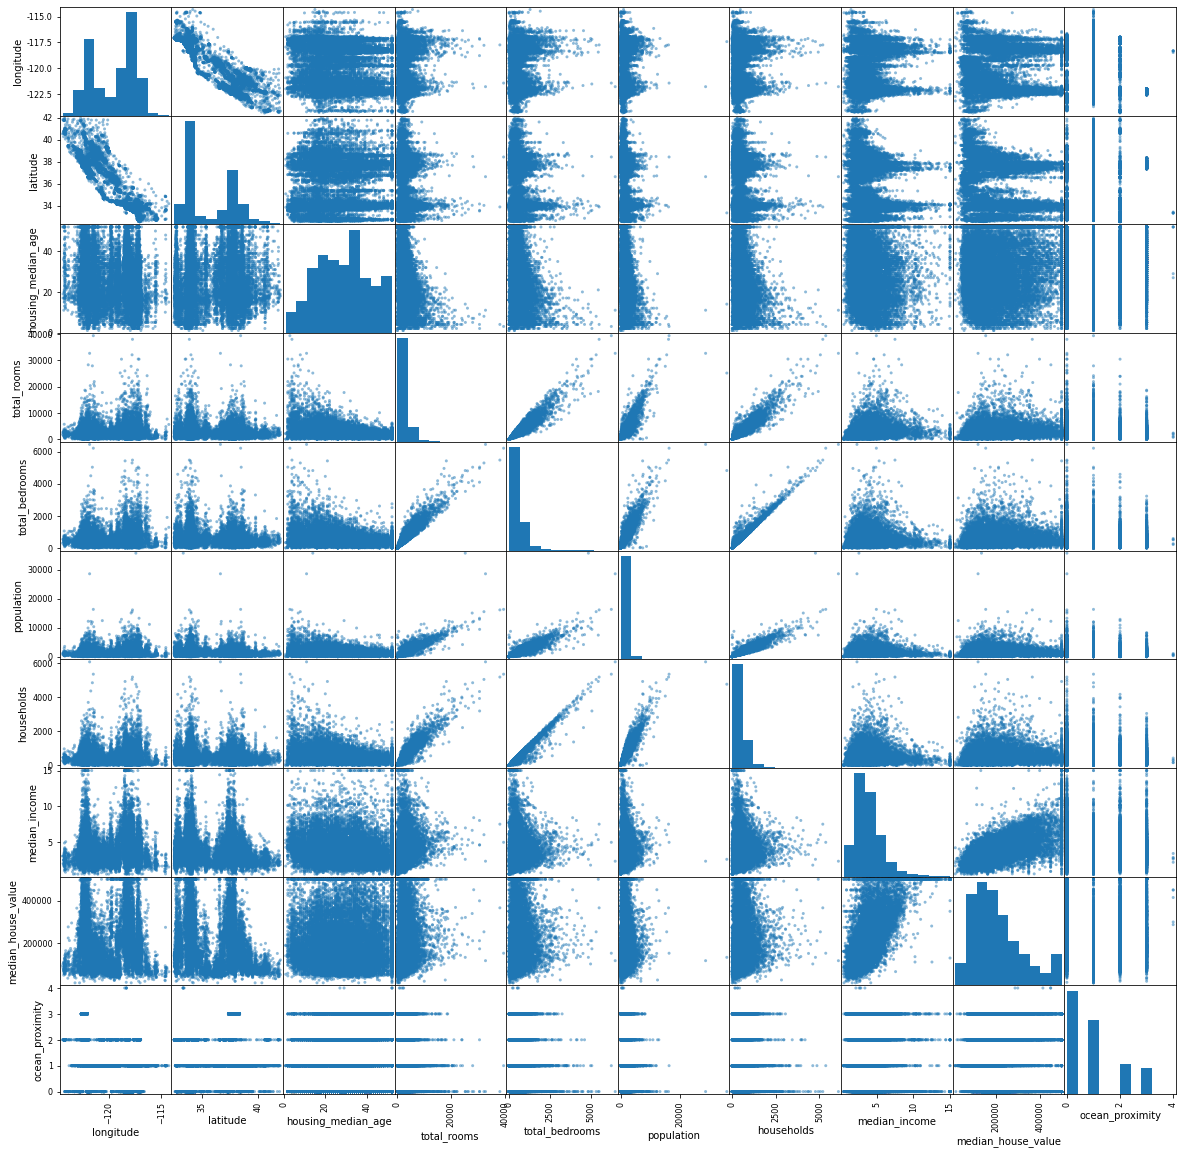

In [11]:
pd.plotting.scatter_matrix(df,figsize=(20,20));